In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load in data from different mitsuba variant tests
variants = ["llvm_mono", "llvm_ad_rgb", "cuda_mono", "cuda_ad_rgb"]

timing_data = []
for variant in variants:
    data = np.loadtxt("cluster_"+variant+"_tests/"+variant+"_timing_for_n_photons.csv", delimiter=",")
    timing_data.append([variant, data])

print(timing_data)

[['llvm_mono', array([[1.00000000e+00, 1.05129957e-02, 2.57596254e-02, 2.46939373e-01],
       [1.00000000e+01, 9.32824612e-03, 2.32834101e-02, 5.26016688e-01],
       [1.00000000e+02, 1.13177776e-02, 2.48917818e-02, 3.12688947e-01],
       [1.00000000e+03, 1.21465445e-02, 2.56348372e-02, 2.95635891e-01],
       [1.00000000e+04, 1.05502844e-02, 2.59472609e-02, 2.64887524e-01],
       [1.00000000e+05, 1.73044920e-02, 3.30821991e-02, 2.73281765e-01],
       [1.00000000e+06, 7.98907280e-02, 9.58729744e-02, 3.38080430e-01],
       [1.00000000e+07, 7.68381500e-01, 7.86144400e-01, 1.03386862e+00],
       [1.00000000e+08, 7.12383196e+00, 7.13782079e+00, 7.30298429e+00],
       [1.00997280e+08, 1.67086301e+01, 1.67398439e+01, 1.69390427e+01]])], ['llvm_ad_rgb', array([[1.00000000e+00, 1.06134176e-02, 2.71409750e-02, 2.47585320e-01],
       [1.00000000e+01, 9.88752842e-03, 2.46466637e-02, 5.12477851e-01],
       [1.00000000e+02, 9.14003849e-03, 2.26983786e-02, 2.87920856e-01],
       [1.0000000

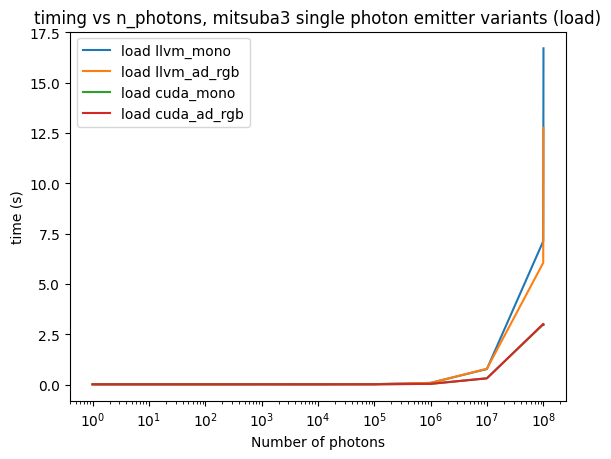

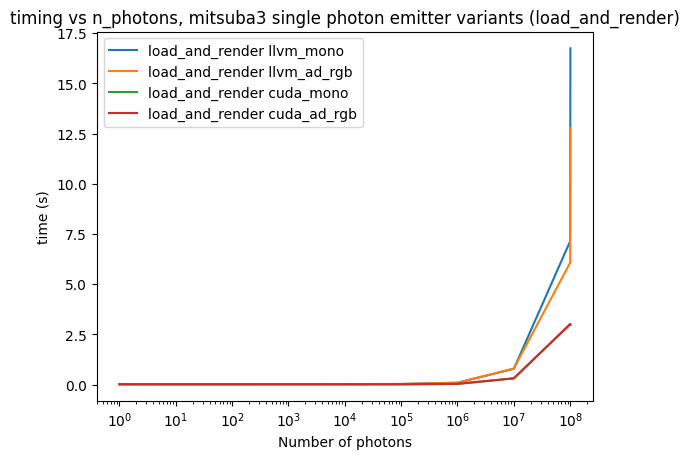

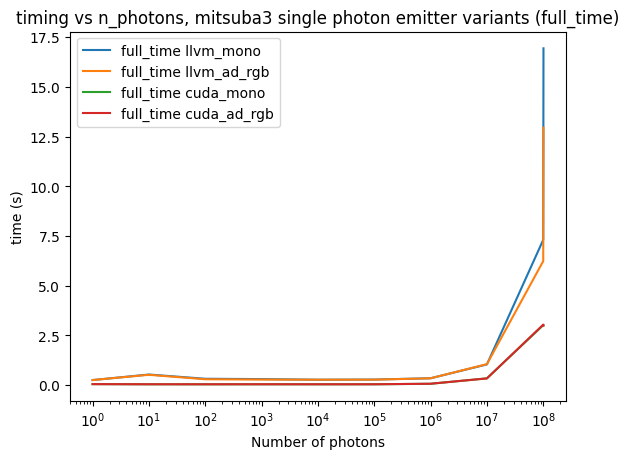

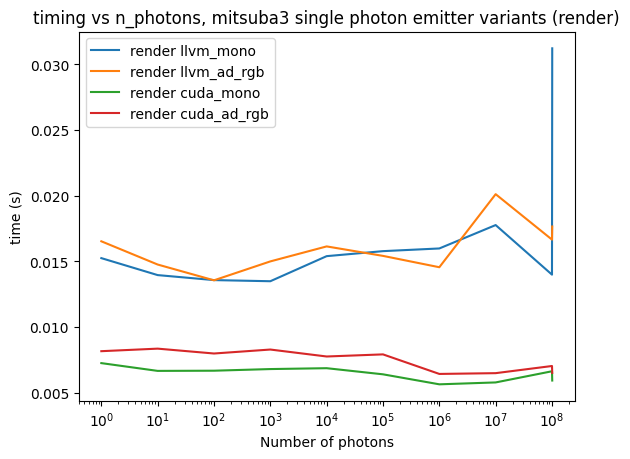

In [3]:
# Plot each variant for each column 
columns = ["load", "load_and_render", "full_time"]

for ncol, column in enumerate(columns):
    fig = plt.figure()
    plt.plot([tn[0] for tn in timing_data[0][1]], [tn[ncol+1] for tn in timing_data[0][1]], label=column+' '+timing_data[0][0])
    plt.plot([tn[0] for tn in timing_data[1][1]], [tn[ncol+1] for tn in timing_data[1][1]], label=column+' '+timing_data[1][0])
    plt.plot([tn[0] for tn in timing_data[2][1]], [tn[ncol+1] for tn in timing_data[2][1]], label=column+' '+timing_data[2][0])
    plt.plot([tn[0] for tn in timing_data[3][1]], [tn[ncol+1] for tn in timing_data[3][1]], label=column+' '+timing_data[3][0])
    plt.legend()
    plt.xscale('log')
    plt.ylabel('time (s)')
    plt.xlabel('Number of photons')
    plt.title('timing vs n_photons, mitsuba3 single photon emitter variants ('+column+')')
    plt.savefig(column+'_timing_for_n_photons')

# Alost plot just rendering time (column 2 minus column 1)
fig = plt.figure()
plt.plot([tn[0] for tn in timing_data[0][1]], [tn[2]-tn[1] for tn in timing_data[0][1]], label='render '+timing_data[0][0])
plt.plot([tn[0] for tn in timing_data[1][1]], [tn[2]-tn[1] for tn in timing_data[1][1]], label='render '+timing_data[1][0])
plt.plot([tn[0] for tn in timing_data[2][1]], [tn[2]-tn[1] for tn in timing_data[2][1]], label='render '+timing_data[2][0])
plt.plot([tn[0] for tn in timing_data[3][1]], [tn[2]-tn[1] for tn in timing_data[3][1]], label='render '+timing_data[3][0])
plt.legend()
plt.xscale('log')
plt.ylabel('time (s)')
plt.xlabel('Number of photons')
plt.title('timing vs n_photons, mitsuba3 single photon emitter variants (render)')
plt.savefig('render_timing_for_n_photons')
